In [ ]:
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional, Dropout
from sklearn.metrics import classification_report


## RNN (0.8564)

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 128

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(Dropout(0.2))
model.add(SimpleRNN(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 500, 32)           320000    
                                                                 
 dropout_29 (Dropout)        (None, 500, 32)           0         
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 256)               8448      
                                                                 
 dropout_30 (Dropout)        (None, 256)               0         
                                                                 
 dense_30 (Dense)            (None, 1)                 257       
                                                                 
Total params: 330785 (1.26 MB)
Trainable params: 3307

In [ ]:
history = model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=4,
          validation_split=0.3
)

Epoch 1/4
137/137 [==============================] - 30s 210ms/step - loss: 0.6286 - acc: 0.6178 - val_loss: 0.5007 - val_acc: 0.7569
Epoch 2/4
137/137 [==============================] - 29s 212ms/step - loss: 0.3912 - acc: 0.8346 - val_loss: 0.3913 - val_acc: 0.8292
Epoch 3/4
137/137 [==============================] - 32s 231ms/step - loss: 0.3101 - acc: 0.8732 - val_loss: 0.3784 - val_acc: 0.8397
Epoch 4/4
137/137 [==============================] - 29s 213ms/step - loss: 0.2488 - acc: 0.9017 - val_loss: 0.3585 - val_acc: 0.8552


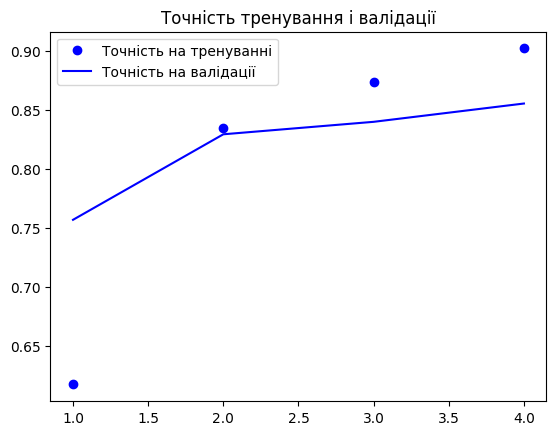

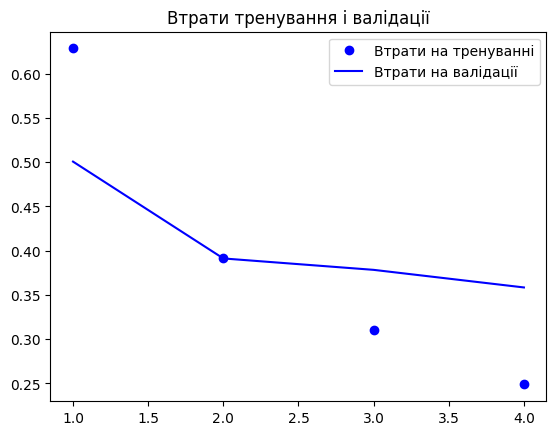

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 24s 31ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 24s 31ms/step - loss: 0.3607 - acc: 0.8565
Test Loss: 0.36068078875541687
Test Accuracy: 0.8564800024032593


## LSTM (0.8810)

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 128

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()
# model.add(Embedding(max_features, 32))
# model.add(LSTM(32))
# model.add(Dense(1, activation='sigmoid'))

model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 dropout_2 (Dropout)         (None, 500, 32)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 256)               8448      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 337025 (1.29 MB)
Trainable params: 33702

In [ ]:
history = model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=2,
          validation_split=0.3
)

Epoch 1/2
137/137 [==============================] - 59s 412ms/step - loss: 0.4866 - acc: 0.7466 - val_loss: 0.3258 - val_acc: 0.8645
Epoch 2/2
137/137 [==============================] - 60s 435ms/step - loss: 0.2353 - acc: 0.9083 - val_loss: 0.2938 - val_acc: 0.8879


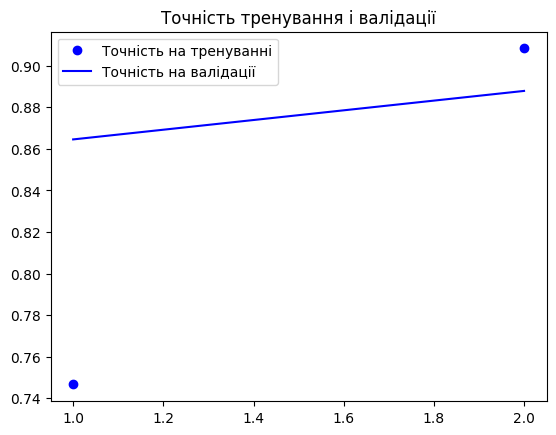

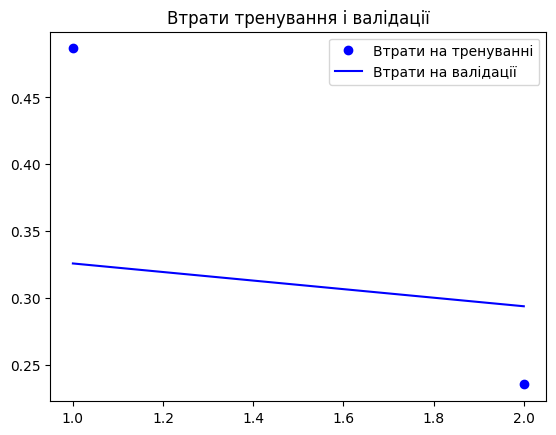

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 38s 48ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 38s 48ms/step - loss: 0.3084 - acc: 0.8811
Test Loss: 0.3083973526954651
Test Accuracy: 0.8810799717903137


## Bidirectional RNN (0.8679)

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 256

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 500, 32)           320000    
                                                                 
 dropout_32 (Dropout)        (None, 500, 32)           0         
                                                                 
 bidirectional_4 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_32 (Dense)            (None, 256)               16640     
                                                                 
 dropout_33 (Dropout)        (None, 256)               0         
                                                                 
 dense_33 (Dense)            (None, 1)                 257       
                                                     

In [ ]:
history = model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=4,
          validation_split=0.3
)

Epoch 1/4
69/69 [==============================] - 84s 1s/step - loss: 0.6079 - acc: 0.6653 - val_loss: 0.4093 - val_acc: 0.8313
Epoch 2/4
69/69 [==============================] - 75s 1s/step - loss: 0.2916 - acc: 0.8793 - val_loss: 0.3218 - val_acc: 0.8653
Epoch 3/4
69/69 [==============================] - 76s 1s/step - loss: 0.1897 - acc: 0.9302 - val_loss: 0.3070 - val_acc: 0.8924
Epoch 4/4
69/69 [==============================] - 76s 1s/step - loss: 0.1387 - acc: 0.9509 - val_loss: 0.3202 - val_acc: 0.8853


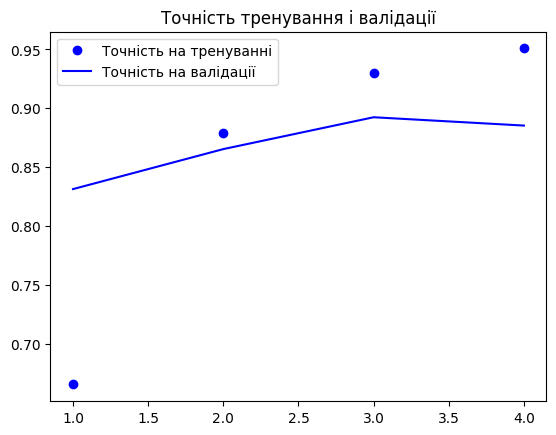

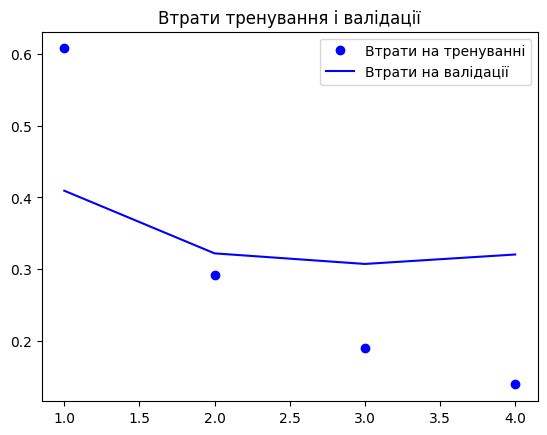

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 64s 81ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 64s 81ms/step - loss: 0.3628 - acc: 0.8680
Test Loss: 0.3627738356590271
Test Accuracy: 0.8679999709129333


## Deep RNN (0.8550)

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 256

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [ ]:
model = Sequential()

model.add(Embedding(input_dim=max_features, output_dim=32, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 500, 32)           320000    
                                                                 
 dropout_34 (Dropout)        (None, 500, 32)           0         
                                                                 
 bidirectional_5 (Bidirecti  (None, 500, 64)           16640     
 onal)                                                           
                                                                 
 bidirectional_6 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_34 (Dense)            (None, 256)               16640     
                                                                 
 dropout_35 (Dropout)        (None, 256)             

In [ ]:
history = model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=3,
          validation_split=0.3
)

Epoch 1/3
69/69 [==============================] - 216s 3s/step - loss: 0.5651 - acc: 0.6849 - val_loss: 0.3811 - val_acc: 0.8423
Epoch 2/3
69/69 [==============================] - 205s 3s/step - loss: 0.2698 - acc: 0.8923 - val_loss: 0.2887 - val_acc: 0.8828
Epoch 3/3
69/69 [==============================] - 205s 3s/step - loss: 0.1727 - acc: 0.9379 - val_loss: 0.3339 - val_acc: 0.8727


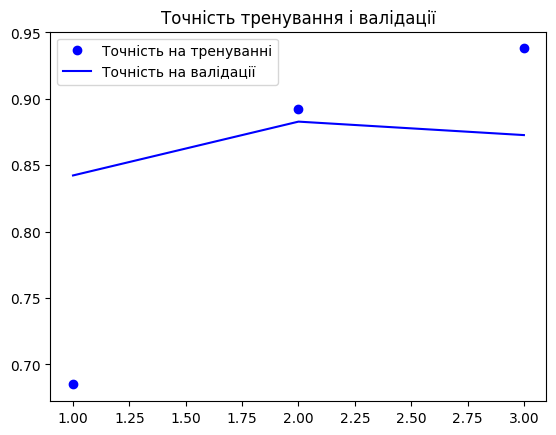

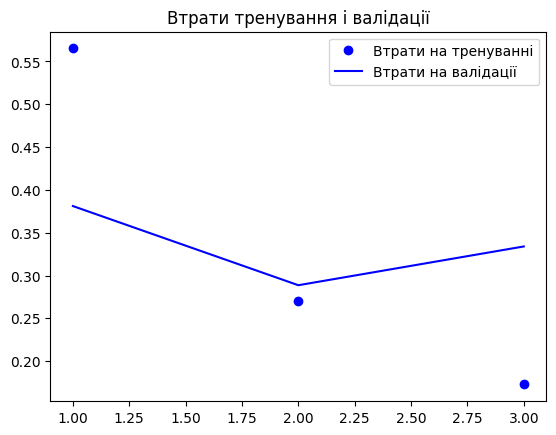

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')
plt.plot(epochs, val_acc, 'b', label='Точність на валідації')
plt.title('Точність тренування і валідації')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')
plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')
plt.title('Втрати тренування і валідації')
plt.legend()

plt.show()

In [ ]:
predictions = model.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 [==============================] - 134s 170ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 134s 171ms/step - loss: 0.3709 - acc: 0.8550
Test Loss: 0.3709447383880615
Test Accuracy: 0.8550000190734863


## Висновок

Виконуючи класифікації рецензій із датасету imdb, було створено рекурентну нейронну мережу за допомогою механізмів Keras, де були використані різні методи побудови самої мережі, а саме:
- RNN (результат точності 0,8564)
- LSTM (результат точності 0,8810)
- Bidirectional RNN (результат точності 0,8679)
- Deep RNN (результат точності 0,8550)

Відповідно можна сказати, що найкраще відпрацювала модель з LSTM, при тому, що вона досягла такого результату за 2 епохи.